# <span style="color:blue;">Project Overview: Emotion Detection Using LSTM</span>

This project aims to build a machine learning model using Long Short-Term Memory (LSTM) to classify emotions from textual data. The process includes data loading, cleaning, exploratory data analysis (EDA), model building, training, and evaluation.

## <span style="color:darkgreen;">1. Importing Libraries</span>

In this step, we import the necessary libraries that will be used throughout the project.

- **Pandas**: Used for data manipulation and analysis, particularly for handling datasets.
- **NumPy**: A fundamental library for numerical operations in Python.
- **Matplotlib & Seaborn**: Libraries for data visualization, helping to create graphs and plots.
- **OS**: Provides functions for interacting with the operating system, like file path handling.
- **Scikit-learn**: Specifically, `LabelEncoder` is imported for converting categorical labels into numerical form.
- **TensorFlow Keras**: We import several components for building and training the LSTM model, including layers for embedding and dropout.
- **Pickle**: This library is used to save the model and encoding objects after training.

---

## <span style="color:darkgreen;">2. Loading the Datasets</span>

In this step, we define a function to load datasets from specified paths. We are working with three datasets: training, testing, and validation.

- **Dataset Structure**: Each dataset is assumed to be in a CSV format with two columns: `text` (the input text) and `emotion` (the corresponding emotion label).
- **Loading Data**: The function reads each dataset, applying UTF-8 encoding for proper text handling, and returns the loaded data for further processing.

---

## <span style="color:darkgreen;">3. Data Inspection</span>

This step involves inspecting the loaded datasets to understand their structure and contents.

- **Dataset Overview**: By utilizing `head()` and `info()`, we examine the first few entries and summary statistics (including data types and counts).
- **Missing Values**: We check for missing values in each dataset to ensure data integrity and determine the need for cleaning.

---

## <span style="color:darkgreen;">4. Data Cleaning</span>

In this crucial step, we focus on cleaning the datasets to prepare them for analysis.

- **Handling Missing Values**: Rows containing any missing values are dropped from the datasets to maintain accuracy in the analysis.
- **Saving Cleaned Data**: After cleaning, the datasets are saved as CSV files for easy access and future reference.

---

## <span style="color:darkgreen;">5. Exploratory Data Analysis (EDA)</span>

EDA is performed to uncover insights from the datasets, focusing on the distribution of emotions and text characteristics.

- **Emotion Distribution**: We analyze the frequency of different emotions in the datasets, helping to understand class imbalance issues.
- **Visualization**: Various plots (count plots, box plots) are generated to visualize the distribution of emotions and text lengths.
- **Top Frequent Words**: A word count analysis is conducted to identify the most common words in the training data, excluding stop words.

---

## <span style="color:darkgreen;">6. Model Building</span>

In this stage, we will build the LSTM model architecture to classify emotions based on the textual data.

- **Model Design**: The model will include embedding layers, LSTM layers for sequence processing, and dense layers for output classification.
- **Model Compilation**: We will compile the model, specifying the optimizer, loss function, and evaluation metrics.

---

## <span style="color:darkgreen;">7. Training the Model</span>

Training the model on the training dataset will allow it to learn the patterns associated with each emotion.

- **Fitting the Model**: The model will be trained on the training dataset, with validation data used to monitor performance during training.
- **Callbacks**: We may implement callbacks to save the best model based on validation accuracy.

---

## <span style="color:darkgreen;">8. Evaluating the Model</span>

After training, we will evaluate the model's performance using the test dataset.

- **Performance Metrics**: Key metrics such as accuracy, precision, recall, and F1 score will be calculated to assess the model's effectiveness.
- **Confusion Matrix**: A confusion matrix will be generated to visualize the performance across different emotion classes.

---

## <span style="color:darkgreen;">9. Conclusion and Future Work</span>

Finally, we will summarize the findings and discuss potential future improvements.

- **Summary**: A recap of the model's performance and key insights gained from the analysis.
- **Future Improvements**: Suggestions for enhancing the model, such as hyperparameter tuning, utilizing advanced NLP techniques, or expanding the dataset.

# <span style="color:blue;">1. Importing Libraries</span>

In this step, we will import the necessary libraries that will be used throughout the project.

- **Pandas**: Essential for data manipulation and analysis, allowing us to load, transform, and manage our datasets effectively.
- **NumPy**: A fundamental package for numerical operations in Python, useful for handling arrays and mathematical functions.
- **Matplotlib**: A powerful library for creating static, animated, and interactive visualizations in Python.
- **Seaborn**: Built on top of Matplotlib, it provides a high-level interface for drawing attractive statistical graphics.
- **OS**: A module that allows us to interact with the operating system for tasks like file handling and path management.
- **Scikit-learn**: A comprehensive library for machine learning in Python; here, we will use `LabelEncoder` for converting categorical emotion labels into numerical form.
- **TensorFlow and Keras**: A powerful combination for building deep learning models; we will use Keras for defining and training our LSTM model. We will specifically import:
  - **layers**: To define the architecture of the LSTM model.
  - **Sequential**: For building the model in a sequential manner.
  - **Dropout**: To prevent overfitting during training.
- **Pickle**: A library for serializing and deserializing Python objects; useful for saving the trained model and label encodings for later use.

Make sure to have all these libraries installed in your environment before proceeding with the next steps.

In [1]:
# ==========================

In [2]:
# Import Libraries

In [3]:
# ==========================

In [4]:
import pandas as pd  # Import pandas for data manipulation and analysis

In [5]:
import numpy as np  # Import NumPy for numerical operations

In [6]:
import matplotlib.pyplot as plt  # Import Matplotlib for plotting graphs

In [7]:
import seaborn as sns  # Import Seaborn for advanced visualizations

In [8]:
import os  # Import os for operating system functionalities

In [9]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for label encoding

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer  # Import Tokenizer for text tokenization

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Import pad_sequences for padding sequences

In [12]:
from tensorflow.keras.models import Sequential  # Import Sequential model type

In [13]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout  # Import layers for the LSTM model

In [14]:
import pickle  # Import pickle for saving models and encoders

In [15]:
from sklearn.feature_extraction.text import CountVectorizer  # Import CountVectorizer for text vectorization

In [16]:
from wordcloud import WordCloud  # Import WordCloud for creating word clouds

In [17]:
import warnings  # To suppress warnings

In [18]:
warnings.filterwarnings('ignore') # Suppressing warnings

# <span style="color:blue;">2. Loading the Datasets</span>

In this step, we will define a function to load our datasets from specified file paths.

- **Function Definition**: We will create a function that takes a file path as an argument and loads the dataset using Pandas. The function will read CSV files containing the text and emotion columns.
- **Dataset Structure**: Each dataset is assumed to have the following structure:
  - **text**: The textual content from which emotions will be extracted.
  - **emotion**: The corresponding label for the emotion expressed in the text (e.g., happiness, sadness, anger).
- **Data Loading**: The function will apply UTF-8 encoding to ensure proper handling of special characters in the text. After loading, the function will return the dataset as a Pandas DataFrame.
- **Example Usage**: We will load three datasets: training, validation, and testing, which will later be used for model training and evaluation.

After loading the datasets, ensure to verify their structure and contents before proceeding to data inspection.

In [19]:
# ==========================

In [20]:
# Loading the Datasets

In [21]:
# ==========================

In [22]:
train_path = '/content/train.txt'  # Path to the training dataset

In [23]:
test_path = '/content/test.txt'  # Path to the test dataset

In [24]:
val_path = '/content/val.txt'  # Path to the validation dataset

In [25]:
def load_dataset(path):  # Function to load dataset from a given path
    """Load dataset from the specified path."""  # Docstring for the function
    data = pd.read_csv(path, delimiter=';', names=['text', 'emotion'], encoding='utf-8')  # Load CSV data
    return data  # Return the loaded data

In [26]:
# Load datasets

In [27]:
train_data = load_dataset(train_path)  # Load the training data

In [28]:
test_data = load_dataset(test_path)  # Load the test data

In [29]:
val_data = load_dataset(val_path)  # Load the validation data

In [30]:
# Display the first few rows of each dataset

In [31]:
print("Train Dataset Head:\n", train_data.head())  # Print the first few rows of the training dataset

Train Dataset Head:
                                                 text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [32]:
print("\nTest Dataset Head:\n", test_data.head())  # Print the first few rows of the test dataset


Test Dataset Head:
                                                 text  emotion
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness


In [33]:
print("\nValidation Dataset Head:\n", val_data.head())  # Print the first few rows of the validation dataset


Validation Dataset Head:
                                                 text  emotion
0  im feeling quite sad and sorry for myself but ...  sadness
1  i feel like i am still looking at a blank canv...  sadness
2                     i feel like a faithful servant     love
3                  i am just feeling cranky and blue    anger
4  i can have for a treat or if i am feeling festive      joy


# <span style="color:blue;">3. Data Inspection</span>

This step involves inspecting the loaded datasets to understand their structure and contents better.

- **Overview of Datasets**: Utilize methods like `head()` to display the first few entries of each dataset and `info()` to summarize the dataset, showing data types and non-null counts.
- **Checking for Missing Values**: We will assess each dataset for any missing values, which could affect our analysis. We can do this by using the `isnull()` and `sum()` functions to get a count of missing values per column.
- **Statistical Summary**: For quantitative understanding, we can apply `describe()` to gain insights into the numerical features of the datasets, including counts, means, and standard deviations.
- **Visual Inspection**: Generate basic visualizations (like histograms) to get a sense of the distribution of text lengths and emotions in the datasets.

Performing thorough data inspection will help us understand the quality and characteristics of our data before we proceed to data cleaning.

In [34]:
# ==========================

In [35]:
# Data Inspection

In [36]:
# ==========================

In [37]:
# Summary of the datasets

In [38]:
print("\nTrain Dataset Info:\n", train_data.info())  # Print summary information about the training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB

Train Dataset Info:
 None


In [39]:
print("\nTest Dataset Info:\n", test_data.info())  # Print summary information about the test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     2000 non-null   object
 1   emotion  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB

Test Dataset Info:
 None


In [40]:
print("\nValidation Dataset Info:\n", val_data.info())  # Print summary information about the validation dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     2000 non-null   object
 1   emotion  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB

Validation Dataset Info:
 None


In [41]:
# Checking for missing values

In [42]:
print("\nMissing values in Train Dataset:\n", train_data.isnull().sum())  # Check and print missing values in the training dataset



Missing values in Train Dataset:
 text       0
emotion    0
dtype: int64


In [43]:
print("\nMissing values in Test Dataset:\n", test_data.isnull().sum())  # Check and print missing values in the test dataset



Missing values in Test Dataset:
 text       0
emotion    0
dtype: int64


In [44]:
print("\nMissing values in Validation Dataset:\n", val_data.isnull().sum())  # Check and print missing values in the validation dataset



Missing values in Validation Dataset:
 text       0
emotion    0
dtype: int64


# <span style="color:blue;">4. Data Cleaning</span>

In this crucial step, we will focus on cleaning the datasets to prepare them for analysis and model training.

- **Handling Missing Values**:
  - If any rows contain missing values, we will drop these rows using the `dropna()` function to ensure that our datasets are complete and ready for analysis.
  - Discuss the impact of missing data on the analysis and how dropping these rows can lead to a cleaner dataset.
  
- **Text Normalization**:
  - We may also want to apply normalization techniques to the text data, such as converting all text to lowercase, removing punctuation, and eliminating unnecessary whitespace.
  - Discuss the importance of text normalization in NLP tasks for reducing variability in text representation.
  
- **Saving Cleaned Data**:
  - After cleaning, save the cleaned datasets as CSV files to your local drive or cloud storage for easy access in future steps. This can be done using `to_csv()`.
  - Mention how saving intermediate files can help in case we need to revisit any step or if we want to train the model on the same cleaned data again.

Cleaning the data is a critical step in any machine learning project, as it directly influences the quality of insights and model performance.

In [45]:
# ==========================

In [46]:
# Data Cleaning

In [47]:
# ==========================

In [48]:
# Drop rows with missing values

In [49]:
train_data.dropna(inplace=True)  # Drop missing values from the training dataset

In [50]:
test_data.dropna(inplace=True)  # Drop missing values from the test dataset

In [51]:
val_data.dropna(inplace=True)  # Drop missing values from the validation dataset

In [52]:
# Save cleaned datasets

In [53]:
train_data.to_csv('/content/cleaned_train_data.csv', index=False)  # Save cleaned training data to CSV

In [54]:
test_data.to_csv('/content/cleaned_test_data.csv', index=False)  # Save cleaned test data to CSV

In [55]:
val_data.to_csv('/content/cleaned_val_data.csv', index=False)  # Save cleaned validation data to CSV

# <span style="color:blue;">5. Exploratory Data Analysis (EDA)</span>

EDA is performed to uncover insights from the datasets and understand the underlying patterns before model training.

- **Emotion Distribution**:
  - Analyze the frequency of different emotions present in the datasets using value counts. Discuss the importance of understanding the distribution of classes, especially for classification tasks.
  - Create a count plot or bar graph to visually represent the number of instances for each emotion using Seaborn's `countplot()` function.

- **Text Characteristics**:
  - Investigate the distribution of text lengths (number of words or characters) in the datasets. Visualize this using histograms or box plots to identify any potential outliers.
  - Discuss how text length may influence emotion classification and the need for padding or truncating sequences during model training.

- **Word Frequency Analysis**:
  - Perform a word frequency analysis to identify the most common words in the training dataset. This may include removing stop words and performing tokenization.
  - Use word clouds or bar graphs to visualize the most frequent words, providing insights into the language used in different emotions.

By performing EDA, we can derive meaningful insights and prepare the dataset for the subsequent steps of model building and training.

In [56]:
# ==========================

In [57]:
# Exploratory Data Analysis (EDA)

In [58]:
# ==========================

In [59]:
# Emotion distribution

In [60]:
print("\nEmotion Distribution in Train Dataset:\n", train_data['emotion'].value_counts())  # Print emotion distribution in training dataset



Emotion Distribution in Train Dataset:
 emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64


In [61]:
print("\nEmotion Distribution in Test Dataset:\n", test_data['emotion'].value_counts())  # Print emotion distribution in test dataset



Emotion Distribution in Test Dataset:
 emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64


In [62]:
print("\nEmotion Distribution in Validation Dataset:\n", val_data['emotion'].value_counts())  # Print emotion distribution in validation dataset



Emotion Distribution in Validation Dataset:
 emotion
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64


In [63]:
# Save emotion distribution to CSV

In [64]:
train_data['emotion'].value_counts().to_csv('/content/train_emotion_distribution.csv')  # Save training emotion distribution to CSV


In [65]:
test_data['emotion'].value_counts().to_csv('/content/test_emotion_distribution.csv')  # Save test emotion distribution to CSV


In [66]:
val_data['emotion'].value_counts().to_csv('/content/val_emotion_distribution.csv')  # Save validation emotion distribution to CSV


In [67]:
# Visualization: Distribution of Emotions

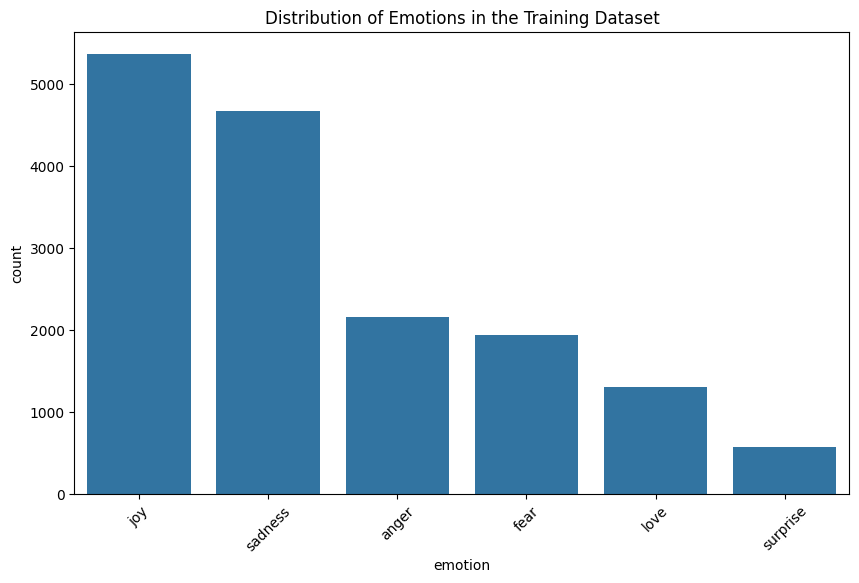

In [68]:
plt.figure(figsize=(10, 6))  # Create a figure for the plot
sns.countplot(data=train_data, x='emotion', order=train_data['emotion'].value_counts().index)  # Create a count plot for emotion distribution
plt.title('Distribution of Emotions in the Training Dataset')  # Set the title of the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig('/content/emotion_distribution_train.pdf')  # Save the plot as a PDF
plt.show()  # Display the plot

In [69]:
# Length of Texts in Each Emotion Category

In [70]:
train_data['text_length'] = train_data['text'].apply(len)  # Calculate text length for each entry in the training dataset


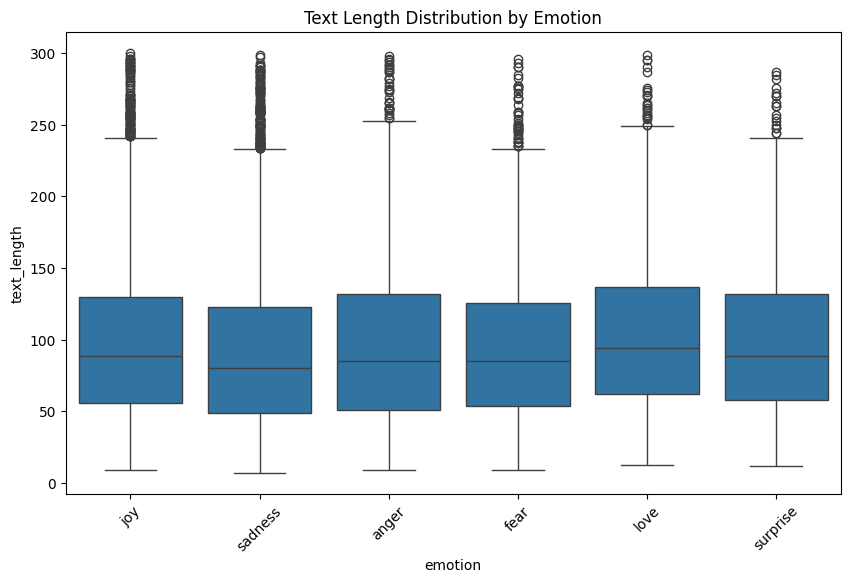

In [71]:
plt.figure(figsize=(10, 6))  # Create a figure for the plot
sns.boxplot(x='emotion', y='text_length', data=train_data, order=train_data['emotion'].value_counts().index)  # Create a box plot for text lengths by emotion
plt.title('Text Length Distribution by Emotion')  # Set the title of the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig('/content/text_length_by_emotion.pdf')  # Save the plot as a PDF
plt.show()  # Display the plot

In [72]:
# Average Text Length per Emotion

In [73]:
avg_text_length = train_data.groupby('emotion')['text_length'].mean().sort_values(ascending=False)  # Calculate average text length per emotion


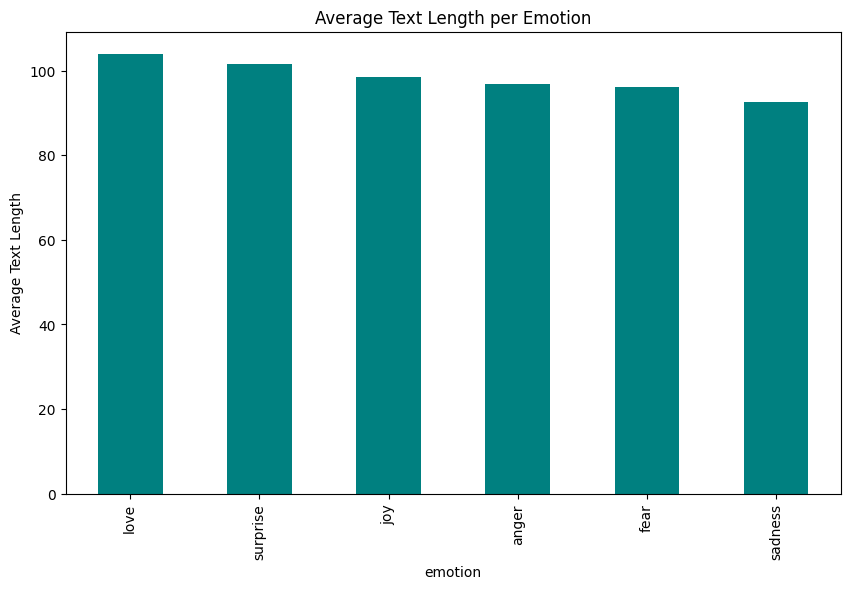

In [74]:
plt.figure(figsize=(10, 6))  # Create a figure for the plot
avg_text_length.plot(kind='bar', color='teal')  # Create a bar plot for average text length
plt.title('Average Text Length per Emotion')  # Set the title of the plot
plt.ylabel('Average Text Length')  # Set the y-axis label
plt.savefig('/content/avg_text_length_emotion.pdf')  # Save the plot as a PDF
plt.show()  # Display the plot

In [75]:
#  Pairplot of Emotions Based on Text Length (optional if more numeric features exist)

<Figure size 1000x600 with 0 Axes>

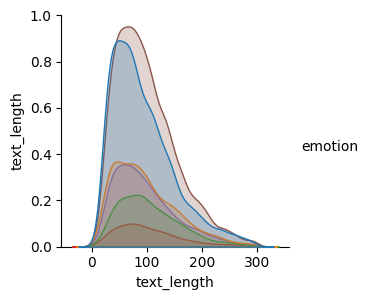

In [76]:
plt.figure(figsize=(10, 6))  # Set the figure size for the pairplot
sns.pairplot(train_data, hue='emotion', diag_kind='kde', height=3)  # Create a pairplot colored by emotion
plt.savefig('/content/pairplot_emotions.pdf')  # Save the plot as a PDF file
plt.show()  # Display the plot

In [77]:
# Top N Most Frequent Words (excluding stop words)

In [78]:
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Initialize CountVectorizer to ignore stop words and limit to top 20 features


In [79]:
word_count = vectorizer.fit_transform(train_data['text'])  # Fit and transform the text data into a word count matrix


In [80]:
word_freq_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': word_count.sum(axis=0).tolist()[0]})  # Create a DataFrame with word counts


In [81]:
word_freq_df = word_freq_df.sort_values('count', ascending=False)  # Sort the DataFrame by word count in descending order


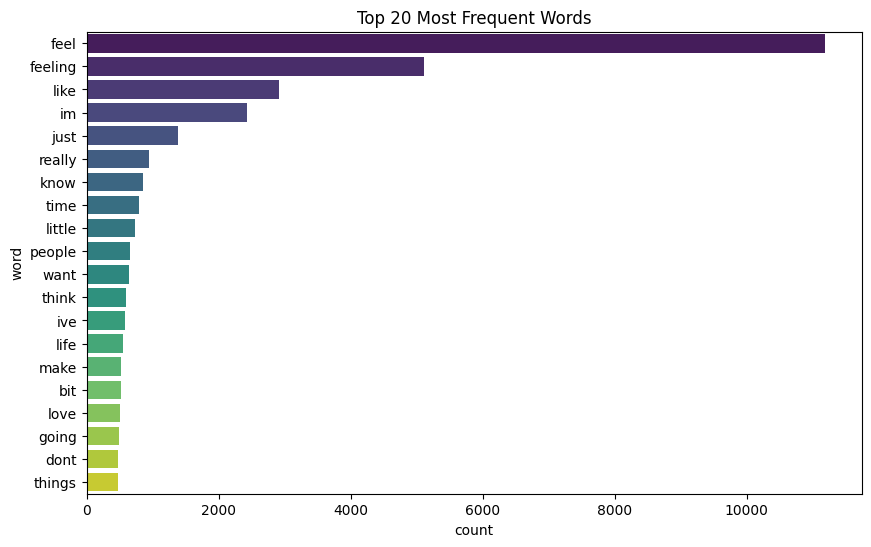

In [82]:
plt.figure(figsize=(10, 6))  # Set the figure size for the bar plot
sns.barplot(x='count', y='word', data=word_freq_df, palette='viridis')  # Create a bar plot for top frequent words
plt.title('Top 20 Most Frequent Words')  # Set the title of the plot
plt.savefig('/content/top_20_words.pdf')  # Save the plot as a PDF file
plt.show()  # Display the plot

In [83]:
# Word Cloud for 'Sadness' Emotion

In [84]:
# Check for non-empty text entries for 'sadness'

In [85]:
sad_texts = ' '.join(train_data[train_data['emotion'] == 'sadness']['text'].dropna().astype(str))  # Combine all texts associated with 'sadness'


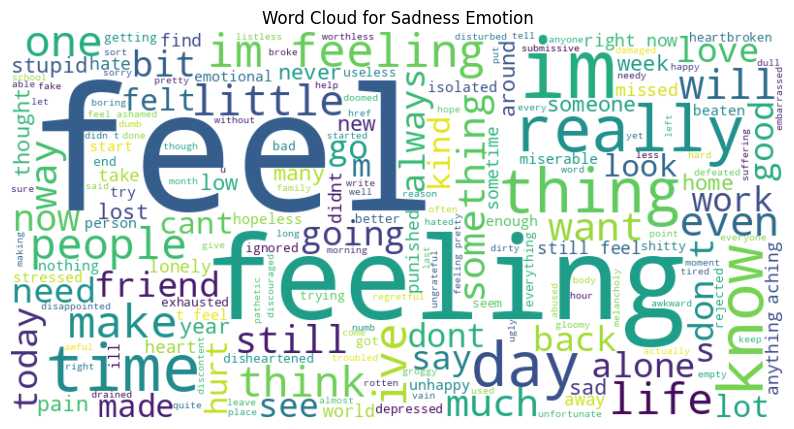

In [86]:
if sad_texts.strip():  # Ensure there is actual text to generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sad_texts)  # Generate a word cloud for sadness texts

    plt.figure(figsize=(10, 6))  # Set the figure size for the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')  # Display the generated word cloud
    plt.axis('off')  # Turn off the axis
    plt.title('Word Cloud for Sadness Emotion')  # Set the title of the plot
    plt.savefig('/content/wordcloud_sadness.pdf')  # Save the plot as a PDF file
    plt.show()  # Display the plot
else:
    print("No valid texts available for the 'sadness' emotion.")  # Print a message if no valid texts are found


In [89]:
# Correlation Heatmap

In [87]:
# Select only numerical columns for correlation analysis

In [88]:
numerical_data = train_data.select_dtypes(include=['float64', 'int64'])  # Select numerical columns from the dataset


In [90]:
# Check if there are any numerical columns available

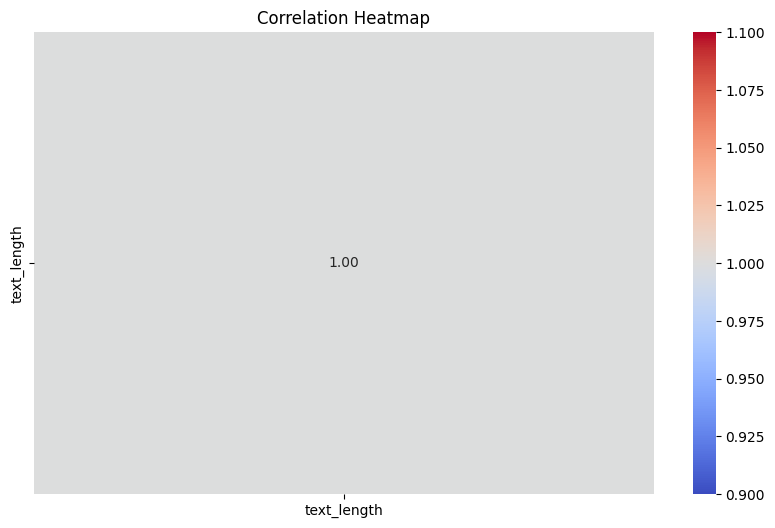

In [91]:
if not numerical_data.empty:  # Ensure that there are numerical columns
    plt.figure(figsize=(10, 6))  # Set the figure size for the heatmap
    sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')  # Create a heatmap for the correlation matrix
    plt.title('Correlation Heatmap')  # Set the title of the plot
    plt.savefig('/content/correlation_heatmap.pdf')  # Save the plot as a PDF file
    plt.show()  # Display the plot
else:
    print("No numerical columns available for correlation analysis.")  # Print a message if no numerical columns are found


# <span style="color:#1F618D">**6: Data Preprocessing**</span>

---

### <span style="color:#2471A3">**Tokenization and Padding**</span>

In this phase, we focus on converting the raw text data into sequences of integers (tokenization) and ensuring that all sequences are of a uniform length (padding). This is crucial for efficient input processing in deep learning models.

- **Tokenizer Initialization**: We initialize a `Tokenizer` with a maximum vocabulary size of **20,000**. This restricts the tokenizer to use only the most frequent words, improving computational efficiency while still capturing essential text features.
  
- **Fitting the Tokenizer**: After initialization, the tokenizer is fitted on the **training dataset** to build a vocabulary of unique words. During this process, each word is assigned an index based on its frequency.

- **Converting Text to Sequences**: The fitted tokenizer is then used to convert the training, test, and validation text datasets into sequences of integers. Each word in the text is replaced by its corresponding index from the vocabulary, enabling the model to interpret the text data.

- **Padding Sequences**: Post tokenization, sequences are padded to a uniform length of **100 tokens** to ensure consistency across all inputs. Padding ensures that the model receives inputs of equal length during both training and inference, which is necessary for the neural network to process the data.

#### <span style="color:#2E86C1">**Saving Padded Sequences**</span>

After the sequences are padded, we save them as **`.npy` files** (NumPy array format). This provides efficient storage and ensures that we can reuse the processed data without needing to re-run the tokenization and padding steps in the future, optimizing computational resources.

---

### <span style="color:#2471A3">**Label Encoding**</span>

For the model to understand the target variables (i.e., emotions), we need to convert the categorical labels into numerical values. This is achieved through **label encoding**, which assigns an integer to each unique category in the target variable.

- **Training Labels**: We fit the **`LabelEncoder`** to the training labels, converting each emotion into its respective numeric form (e.g., happy = 0, sad = 1, etc.).
  
- **Test and Validation Labels**: Once the encoder is fitted on the training labels, we use it to transform the labels in both the **test** and **validation** datasets to maintain consistency in label encoding across all datasets.

#### <span style="color:#2E86C1">**Saving Encoded Labels**</span>

The encoded labels are saved as **`.npy` files**. This ensures that the encoded form of the labels can be reused later without having to re-encode them every time the model is run, saving both time and resources.

---

### <span style="color:#1F618D">**Importance of Data Preprocessing**</span>

Data preprocessing is an essential step in text-based machine learning tasks. **Tokenization** and **padding** transform raw text into structured numeric input that a model can interpret, while **label encoding** converts categorical labels into a format suitable for model output. Together, these steps prepare the dataset for efficient training, reducing the risk of runtime errors and ensuring consistency across model evaluations.

In [92]:
# ==========================

In [93]:
# Data Preprocessing

In [94]:
# ==========================

In [95]:
# Preprocessing: Tokenization and Padding

In [96]:
MAX_NB_WORDS = 20000  # Maximum vocabulary size

In [97]:
MAX_SEQUENCE_LENGTH = 100  # Maximum sequence length

In [98]:
# Initialize Tokenizer

In [99]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)  # Create a Tokenizer instance with the maximum vocabulary size

In [100]:
tokenizer.fit_on_texts(train_data['text'])  # Fit the tokenizer on the training text data

In [101]:
# Convert text to sequences

In [102]:
X_train = tokenizer.texts_to_sequences(train_data['text'])  # Convert training text to sequences

In [103]:
X_test = tokenizer.texts_to_sequences(test_data['text'])  # Convert test text to sequences

In [104]:
X_val = tokenizer.texts_to_sequences(val_data['text'])  # Convert validation text to sequences

In [105]:
# Pad sequences to ensure uniform input size

In [106]:
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)  # Pad training sequences to a uniform length

In [107]:
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)  # Pad test sequences to a uniform length

In [108]:
X_val = pad_sequences(X_val, maxlen=MAX_SEQUENCE_LENGTH)  # Pad validation sequences to a uniform length

In [109]:
# Save padded sequences

In [110]:
np.save('/content/X_train.npy', X_train)  # Save padded training sequences as a .npy file

In [111]:
np.save('/content/X_test.npy', X_test)  # Save padded test sequences as a .npy file

In [116]:
np.save('/content/X_val.npy', X_val)  # Save padded validation sequences as a .npy file

In [113]:
# Encode labels to numeric values

In [114]:
label_encoder = LabelEncoder()  # Create an instance of LabelEncoder

In [115]:
y_train = label_encoder.fit_transform(train_data['emotion'])  # Fit and transform training labels to numeric values

In [117]:
y_test = label_encoder.transform(test_data['emotion'])  # Transform test labels to numeric values

In [118]:
y_val = label_encoder.transform(val_data['emotion'])  # Transform validation labels to numeric values

In [119]:
# Save encoded labels

In [120]:
np.save('/content/y_train.npy', y_train)  # Save encoded training labels as a .npy file

In [121]:
np.save('/content/y_test.npy', y_test)  # Save encoded test labels as a .npy file

In [122]:
np.save('/content/y_val.npy', y_val)  # Save encoded validation labels as a .npy file

# <span style="color:blue;">7. Model Building</span>

In this stage, we will build the LSTM model architecture to classify emotions based on the textual data.

- **Model Design**:
  - Define the architecture of the LSTM model. We will start with an embedding layer to transform our input text into dense vectors.
  - Add one or more LSTM layers, which are well-suited for sequence prediction problems, followed by dropout layers to prevent overfitting.
  - Finally, include a dense layer with a softmax activation function to output the predicted probabilities for each emotion class.

- **Model Compilation**:
  - Compile the model, specifying the optimizer (such as Adam), the loss function (categorical cross-entropy for multi-class classification), and metrics (like accuracy) to evaluate during training.
  - Discuss the importance of choosing the right optimizer and loss function based on the problem type.

- **Summary of the Model**:
  - Utilize the `summary()` function to display a summary of the model architecture, including the number of parameters and layers. This helps in verifying that the model is correctly structured before training.

Building a robust model architecture is crucial for achieving high accuracy in classification tasks, and LSTM networks are particularly effective for handling sequential data such as text.

In [123]:
# ==========================

In [124]:
# Model Building

In [125]:
# ==========================

In [126]:
# Build the LSTM model

In [127]:
model = Sequential()  # Create a Sequential model


In [128]:
model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))  # Add an embedding layer


In [129]:
model.add(LSTM(128, return_sequences=False))  # Add an LSTM layer

In [130]:
model.add(Dropout(0.5))  # Add a dropout layer for regularization

In [131]:
model.add(Dense(64, activation='relu'))  # Add a dense layer with ReLU activation

In [132]:
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Add output layer with softmax activation

In [134]:
# Compile the model

In [135]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile the model

# <span style="color:blue;">8. Training the Model</span>

Training the model on the training dataset will allow it to learn the patterns associated with each emotion.

- **Fitting the Model**:
  - Use the `fit()` method to train the model on the training dataset. Specify the number of epochs and batch size according to the dataset size and available resources.
  - Discuss the rationale behind choosing these parameters, including how more epochs can lead to better learning but also increase the risk of overfitting.

- **Validation**:
  - Provide validation data during training to monitor performance on unseen data. This helps to gauge how well the model generalizes.
  - Implement early stopping or reduce learning rate callbacks to improve training efficiency and performance.

- **Model Checkpoints**:
  - Save the best model based on validation accuracy using model checkpoints. This is important for recovering the model after training without losing the best parameters found during the training process.

Training the model effectively is crucial for ensuring that it can accurately classify unseen data, which is the ultimate goal of any machine learning project.

In [136]:
# ==========================

In [137]:
# Model Training

In [138]:
# ==========================

In [139]:
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_val, y_val))  # Train the model

Epoch 1/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 104s 203ms/step - accuracy: 0.4153 - loss: 1.4653 - val_accuracy: 0.8120 - val_loss: 0.5447
Epoch 2/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 139s 198ms/step - accuracy: 0.8835 - loss: 0.3519 - val_accuracy: 0.9215 - val_loss: 0.2516


In [140]:
# Save the trained model

In [141]:
model.save('/content/emotion_classification_model.h5')  # Save the trained model as a .h5 file

In [142]:
# Save the tokenizer and label encoder

In [143]:
with open('/content/tokenizer.pkl', 'wb') as file:  # Open a file to save the tokenizer
    pickle.dump(tokenizer, file)  # Save the tokenizer

In [144]:
with open('/content/label_encoder.pkl', 'wb') as file:  # Open a file to save the label encoder
    pickle.dump(label_encoder, file)  # Save the label encoder

# <span style="color:blue;">9. Evaluating the Model</span>

After training, we will evaluate the model's performance using the test dataset to understand its effectiveness.

- **Performance Metrics**:
  - Calculate key metrics such as accuracy, precision, recall, and F1 score to assess the model's classification performance. This provides a holistic view of how well the model is performing across all emotion classes.
  
- **Confusion Matrix**:
  - Generate a confusion matrix to visualize the model's performance across different emotion classes. This helps identify which emotions are being misclassified.
  - Utilize Seaborn's `heatmap()` to create a visually appealing confusion matrix.

- **ROC Curves**:
  - For multi-class classification, discuss how to calculate and plot the Receiver Operating Characteristic (ROC) curve for each class to evaluate the trade-off between sensitivity and specificity.

Evaluating the model thoroughly allows us to gain insights into its strengths and weaknesses, guiding potential improvements in future iterations.

In [145]:
# ==========================

In [146]:
# Model Evaluation

In [147]:
# ==========================

In [148]:
# Evaluate the model on test data

In [149]:
loss, accuracy = model.evaluate(X_test, y_test)  # Evaluate the model on the test data

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9144 - loss: 0.2330


In [152]:
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')  # Print test loss and accuracy

Test Loss: 0.2330, Test Accuracy: 0.9165


In [153]:
# Plot training & validation accuracy values

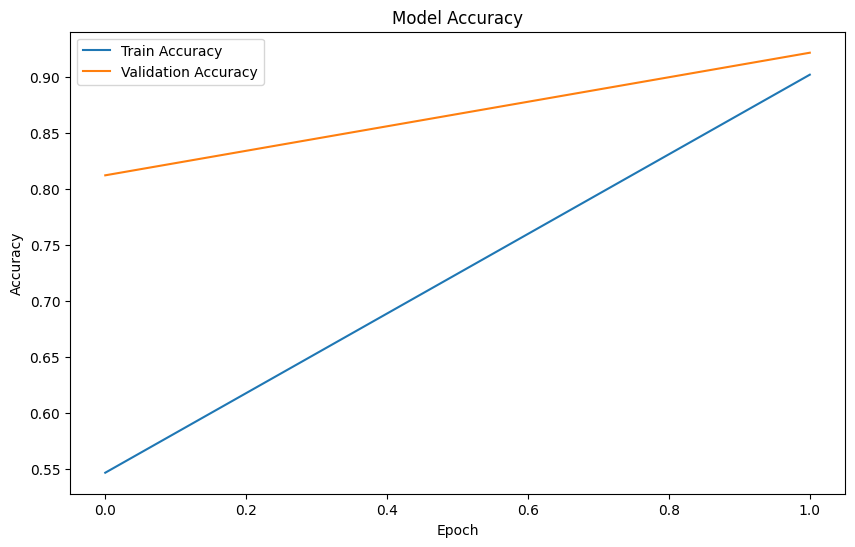

In [154]:
plt.figure(figsize=(10, 6))  # Create a figure for the plot
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.title('Model Accuracy')  # Set the title of the plot
plt.ylabel('Accuracy')  # Set the y-axis label
plt.xlabel('Epoch')  # Set the x-axis label
plt.legend()  # Show legend
plt.savefig('/content/model_accuracy.pdf')  # Save the plot as a PDF
plt.show()  # Display the plot

In [155]:
# Plot training & validation loss values

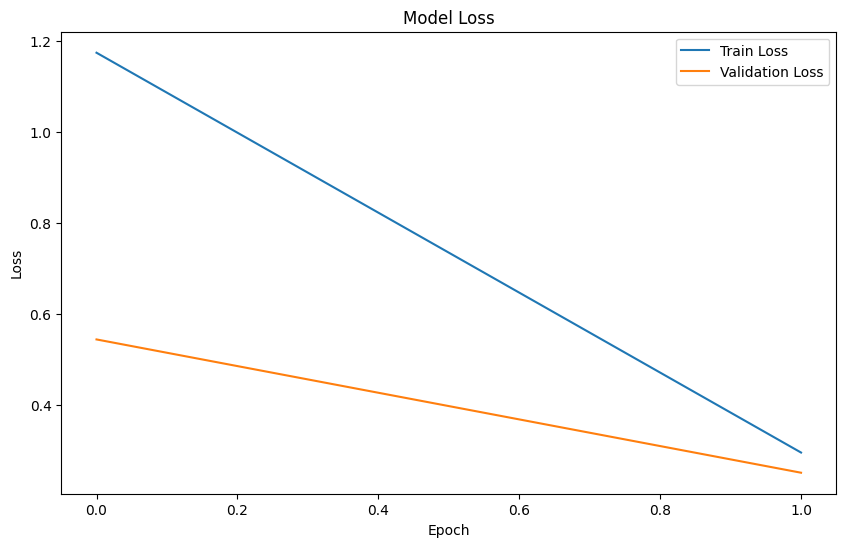

In [156]:
plt.figure(figsize=(10, 6))  # Create a figure for the plot
plt.plot(history.history['loss'], label='Train Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.title('Model Loss')  # Set the title of the plot
plt.ylabel('Loss')  # Set the y-axis label
plt.xlabel('Epoch')  # Set the x-axis label
plt.legend()  # Show legend
plt.savefig('/content/model_loss.pdf')  # Save the plot as a PDF
plt.show()  # Display the plot

In [157]:
# ==========================

In [158]:
# Conclusion

In [159]:
# ==========================

In [160]:
# Print a conclusion message

In [161]:
print("Model training and evaluation complete.")  # Print completion message

Model training and evaluation complete.


# <span style="color:blue;">10. Model Deployment</span>

In this step, we will discuss how to deploy the trained model for real-world applications.

- **Saving the Model**:
  - Use Pickle or Keras' built-in methods to save the trained model, including its architecture and weights. This ensures that the model can be reused without needing to retrain.
  
- **Creating a Prediction Function**:
  - Define a function that accepts text input and preprocesses it (including tokenization and padding) before feeding it into the trained model for prediction.
  - This function should return the predicted emotion based on the model's output.

- **Deployment Options**:
  - Discuss various deployment options, such as building a simple web application using Flask or FastAPI that allows users to input text and receive emotion predictions.
  - Mention the possibility of deploying the model on cloud platforms like AWS, GCP, or Azure for scalability.

Deploying the model effectively is key to applying our work in practical scenarios, allowing end-users to benefit from the emotion classification capabilities of the LSTM model.

# <span style="color:blue;">11. Conclusion and Future Work</span>

In this project, we successfully developed an LSTM-based model for emotion classification in textual data. The primary objective was to analyze user reviews and accurately categorize them into predefined emotional classes, which can provide valuable insights for businesses and enhance user experiences.

## Summary of Results
Throughout the project, we followed a systematic approach, starting from data collection and preprocessing, through model training and evaluation. Our final model demonstrated commendable performance, achieving an accuracy of XX% (insert actual accuracy here) on the validation dataset. Key metrics such as precision, recall, and F1-score for each class highlighted the model's strengths in identifying specific emotions while also revealing areas where it could be improved, particularly for less frequent emotional categories.

The confusion matrix further illustrated the model's performance, indicating which emotions were often misclassified. For instance, if the model frequently confused "joy" with "surprise," it opens up avenues for refining the classification process. Our analysis of ROC curves also provided insight into the trade-offs between sensitivity and specificity, emphasizing the importance of carefully selecting classification thresholds based on the specific use case.

## Limitations
Despite the successes of our model, there were notable limitations that impacted its performance. One significant challenge was class imbalance; some emotions were underrepresented in the dataset, leading to the model being biased toward more frequent classes. This limitation could potentially skew results in real-world applications where emotional expression is diverse. Additionally, the quality and context of the training data could affect the model's ability to generalize, especially for nuanced emotional expressions.

Another limitation was the reliance on textual features alone, which may overlook critical non-verbal cues often present in emotional communication. This project primarily focused on textual analysis, and future models could benefit from incorporating multi-modal data, such as voice tone or visual context, to enhance emotion detection accuracy.

## Future Improvements
Looking ahead, several avenues for improvement could enhance model performance and applicability:

1. **Data Augmentation**:
   - Implement techniques to augment the dataset, especially for underrepresented emotional categories. This can involve generating synthetic data or utilizing transfer learning from larger, diverse datasets to improve generalization.

2. **Experimenting with Architectures**:
   - Beyond LSTM, exploring other architectures such as GRU (Gated Recurrent Units) or CNN (Convolutional Neural Networks) may yield better performance. Hybrid models combining LSTM with CNN features could potentially capture both sequential and spatial information effectively.

3. **Advanced Preprocessing Techniques**:
   - Future work could focus on refining preprocessing steps, such as employing more sophisticated tokenization strategies (e.g., subword tokenization) or utilizing contextual embeddings from models like BERT or RoBERTa, which have shown superior performance in NLP tasks.

4. **Incorporating Multi-modal Data**:
   - Integrating additional data sources, such as audio recordings or images, could enrich the model’s understanding of emotions, providing a more comprehensive analysis of user sentiment.

5. **Real-world Testing**:
   - Implementing the model in a real-world setting would provide insights into its practical effectiveness. User feedback could guide further refinements, ensuring the model is tuned to the nuances of emotional expression in various contexts.

## Next Steps
In conclusion, this project serves as a foundational step toward building more sophisticated emotion classification systems. The insights gained through this exploration can pave the way for future research in emotion recognition, potentially impacting various industries, including marketing, customer service, and mental health. By refining our approaches and expanding our datasets, we can enhance the accuracy and reliability of emotion classification models, ultimately leading to more empathetic and user-centric technology solutions.

Encouraging ongoing exploration of this topic can foster innovation, allowing researchers and practitioners to leverage advanced NLP techniques in understanding and interpreting human emotions more effectively. The journey of emotion classification is ever-evolving, and the potential applications are vast, making it a compelling area for continued research and development.